In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_data = pd.read_csv('C:/Users/HP/Downloads/DS/04-Predictive Analytics I/Logistic Regression/Telecom Churn/churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data = pd.read_csv('C:/Users/HP/Downloads/DS/04-Predictive Analytics I/Logistic Regression/Telecom Churn/customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_data = pd.read_csv('C:/Users/HP/Downloads/DS/04-Predictive Analytics I/Logistic Regression/Telecom Churn/internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
df1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')
telecom = pd.merge(df1, internet_data, how='inner', on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
telecom.shape

(7043, 21)

In [7]:
telecom.describe(percentiles=[.25, .45])

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
45%,24.000000,65.450000,0.000000
50%,29.000000,70.350000,0.000000
max,72.000000,118.750000,1.000000


In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

telecom[varlist] = telecom[varlist].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [10]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [11]:
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

telecom = pd.concat([telecom, dummy1], axis=1)

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [13]:
m1 = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
m1 = m1.drop(['MultipleLines_No phone service'], axis=1)
m1.head()

,MultipleLines_No,MultipleLines_Yes
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [14]:
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
telecom = pd.concat([telecom,os1], axis=1)

ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
telecom = pd.concat([telecom,ob1], axis=1)

dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
telecom = pd.concat([telecom,dp1], axis=1)

ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
telecom = pd.concat([telecom,ts1], axis=1)

st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
telecom = pd.concat([telecom,st1], axis=1)

sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
telecom = pd.concat([telecom,sm1], axis=1)

In [15]:
telecom = pd.concat([telecom, m1], axis=1)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,1,0,1,0,1,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,1,0,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,1,0,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,1,1,0,1,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [17]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [19]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null object
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check         

In [20]:
telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric=True)

In [21]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [22]:
telecom.isnull().sum(axis=0)

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                          0
DeviceProtection_No             

In [23]:
100*(round(telecom.isnull().sum()/(telecom.shape[0]), 4))

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No                          0.00
OnlineBackup_Yes                  

In [24]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [25]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [26]:
telecom.shape

(7032, 32)

In [27]:
100*(round(telecom.isnull().sum()/(telecom.shape[0]), 4))

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No                          0.0
OnlineBackup_Yes                         0.0
DeviceProt

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = telecom.drop(['customerID', 'Churn'], axis=1)
Y = telecom['Churn']

In [30]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [31]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
X_train.shape

(4922, 30)

In [34]:
Y_train.shape

(4922,)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

num_vars = ['tenure','MonthlyCharges','TotalCharges']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [37]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,1,0,1,0,0,1,0,1,0,0
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0


In [38]:
round(100*(sum(telecom['Churn'])/telecom.shape[0]), 2)

26.58

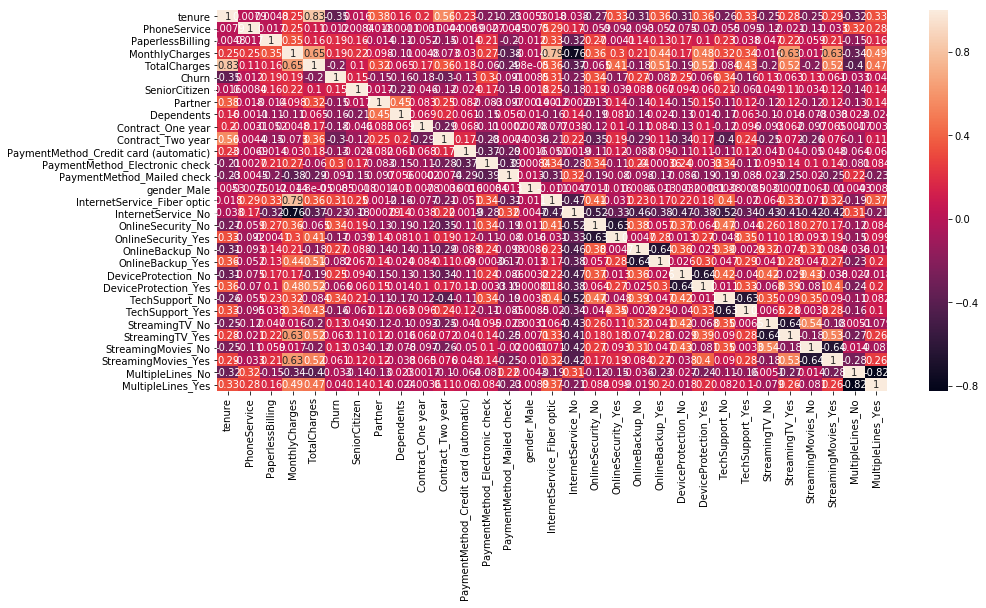

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(telecom.corr(), annot=True)
plt.show()

In [40]:
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)

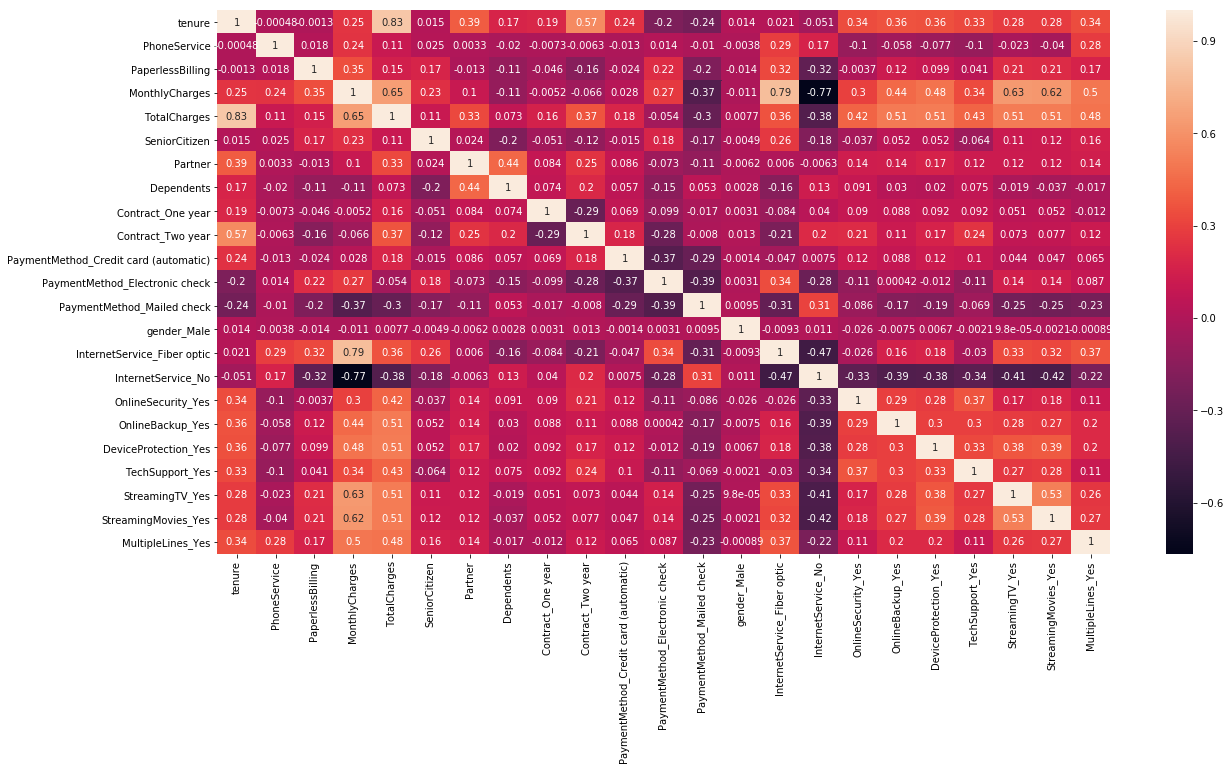

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [42]:
import statsmodels.api as sm

In [43]:
logm1 = sm.GLM(Y_train, (sm.add_constant(X_train)), family=sm.families.Binomial()).fit()

In [44]:
logm1

In [45]:
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 28 Jul 2021   Deviance:                       4009.4
Time:                        15:54:53   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [47]:
logreg = LogisticRegression()

In [48]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, Y_train)

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 4),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 3),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 5),
 ('MultipleLines_Yes', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'MultipleLines_Yes'],
      dtype='object')

In [51]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family=sm.families.Binomial()).fit()

In [52]:
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Wed, 28 Jul 2021   Deviance:                       4023.5
Time:                        15:55:04   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0343      0.171     -6.053      0

In [53]:
Y_train_pred = logm2.predict(X_train_sm)

In [54]:
Y_train_pred.head()

879     0.225111
5790    0.274893
6498    0.692126
880     0.504909
2784    0.645261
dtype: float64

In [55]:
Y_train_pred = Y_train_pred.values.reshape(-1)

In [58]:
Y_train_pred

array([0.22511138, 0.27489289, 0.69212611, ..., 0.04053162, 0.13306887,
       0.03194298])

In [59]:
Y_train_pred_final = pd.DataFrame({'Churn': Y_train, 'Churn_Prob': Y_train_pred})
Y_train_pred_final['CustID'] = Y_train.index
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID
879,0,0.225111,879
5790,0,0.274893,5790
6498,1,0.692126,6498
880,1,0.504909,880
2784,1,0.645261,2784


In [60]:
Y_train_pred_final['Predicted'] = Y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.225111,879,0
5790,0,0.274893,5790,0
6498,1,0.692126,6498,1
880,1,0.504909,880,1
2784,1,0.645261,2784,1


In [61]:
from sklearn import metrics

In [63]:
confusion = metrics.confusion_matrix(Y_train_pred_final['Churn'], Y_train_pred_final['Predicted'])
print(confusion)

[[3270  365]
 [ 579  708]]


In [66]:
print(100*(metrics.accuracy_score(Y_train_pred_final['Churn'], Y_train_pred_final['Predicted'])))

80.82080455099553


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,8.86
3,TotalCharges,7.37
0,tenure,6.88
9,InternetService_Fiber optic,3.97
6,Contract_Two year,3.28
10,InternetService_No,3.25
2,PaperlessBilling,2.68
14,MultipleLines_Yes,2.53
13,StreamingTV_Yes,2.34
12,TechSupport_Yes,2.08


In [74]:
col = col.drop(['PhoneService'])

In [75]:
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'MultipleLines_Yes'],
      dtype='object')

In [76]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(Y_train, X_train_sm, family=sm.families.Binomial()).fit()

In [77]:
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Wed, 28 Jul 2021   Deviance:                       4034.0
Time:                        18:39:04   Pearson chi2:                 5.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.133    -10.437      0

In [78]:
Y_train_pred = logm3.predict(X_train_sm)

In [80]:
Y_train_pred.values.reshape(-1)

array([0.25403236, 0.22497676, 0.69386521, ..., 0.04899277, 0.13039051,
       0.03516376])

In [82]:
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.225111,879,0
5790,0,0.274893,5790,0
6498,1,0.692126,6498,1
880,1,0.504909,880,1
2784,1,0.645261,2784,1


In [83]:
Y_train_pred_final['Churn_Prob'] = Y_train_pred

In [84]:
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.254032,879,0
5790,0,0.224977,5790,0
6498,1,0.693865,6498,1
880,1,0.510087,880,1
2784,1,0.651724,2784,1


In [85]:
Y_train_pred_final['Predicted'] = Y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.254032,879,0
5790,0,0.224977,5790,0
6498,1,0.693865,6498,1
880,1,0.510087,880,1
2784,1,0.651724,2784,1


In [86]:
print(metrics.accuracy_score(Y_train_pred_final['Churn'], Y_train_pred_final['Predicted']))

0.8051605038602194


In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.30
0,tenure,6.79
5,Contract_Two year,3.16
8,InternetService_Fiber optic,2.94
9,InternetService_No,2.53
1,PaperlessBilling,2.52
12,StreamingTV_Yes,2.31
13,MultipleLines_Yes,2.27
11,TechSupport_Yes,2.00
4,Contract_One year,1.83


In [89]:
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'MultipleLines_Yes'],
      dtype='object')

In [90]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLS(Y_train, X_train_sm, family = sm.families.Binomial()).fit()

In [91]:
print(logm4.summary())

                            GLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.280
Model:                            GLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     146.9
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:54:19   Log-Likelihood:                -2127.8
No. Observations:                4922   AIC:                             4284.
Df Residuals:                    4908   BIC:                             4375.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [92]:
Y_train_pred = logm4.predict(X_train_sm).values.reshape(-1)

In [94]:
Y_train_pred_final['Churn_Prob'] = Y_train_pred

In [100]:
Y_train_pred_final['Predicted'] = Y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.345116,879,0
5790,0,0.325688,5790,0
6498,1,0.614704,6498,1
880,1,0.465858,880,0
2784,1,0.567556,2784,1


In [101]:
print(metrics.accuracy_score(Y_train_pred_final['Churn'], Y_train_pred_final['Predicted']))

0.8019097927671678


In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,3.07
7,InternetService_Fiber optic,2.60
1,PaperlessBilling,2.44
12,MultipleLines_Yes,2.24
11,StreamingTV_Yes,2.17
8,InternetService_No,2.12
0,tenure,2.04
10,TechSupport_Yes,1.98
3,Contract_One year,1.82
9,OnlineSecurity_Yes,1.78


In [103]:
confusion

array([[3270,  365],
       [ 579,  708]], dtype=int64)

In [105]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [106]:
TP / float(TP+FN)

0.5501165501165501

In [107]:
TN / float(TN+FP)

0.8995873452544704

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_pred_final['Churn'], Y_train_pred_final['Churn_Prob'])

In [111]:
fpr

array([0.00000000e+00, 0.00000000e+00, 2.75103164e-04, ...,
       9.98074278e-01, 9.98899587e-01, 1.00000000e+00])

In [113]:
thresholds

array([ 0.76744395,  0.76222173,  0.75699952, ..., -0.19307534,
       -0.19755864, -0.23087603])

In [115]:
auc_curve = metrics.roc_auc_score(Y_train_pred_final['Churn'], Y_train_pred_final['Churn_Prob'])

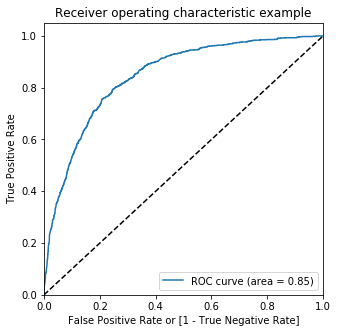

In [120]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [123]:
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.345116,879,0
5790,0,0.325688,5790,0
6498,1,0.614704,6498,1
880,1,0.465858,880,0
2784,1,0.567556,2784,1


In [130]:
numbers = [float(x/10) for x in range(10)]

for i in numbers:
    Y_train_pred_final[i] = Y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.345116,879,0,1,1,1,1,0,0,0,0,0,0
5790,0,0.325688,5790,0,1,1,1,1,0,0,0,0,0,0
6498,1,0.614704,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.465858,880,0,1,1,1,1,1,0,0,0,0,0
2784,1,0.567556,2784,1,1,1,1,1,1,1,0,0,0,0


In [138]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(Y_train_pred_final['Churn'], Y_train_pred_final[i])
    total = sum(sum(cm))
    
    accuracy = (cm[0,0] + cm[1,1]) / total
    speci = cm[0,0] / (cm[0,0] + cm[0,1])
    sensi = cm[1,1] /(cm[1,0] + cm[1,1])
    
    cutoff_df.loc[i] = [i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.409793  0.985237  0.206052
0.1   0.1  0.527428  0.964258  0.372765
0.2   0.2  0.640796  0.928516  0.538927
0.3   0.3  0.741162  0.818182  0.713893
0.4   0.4  0.793377  0.701632  0.825860
0.5   0.5  0.801910  0.487956  0.913067
0.6   0.6  0.786063  0.254856  0.974140
0.7   0.7  0.749289  0.048951  0.997249
0.8   0.8  0.738521  0.000000  1.000000
0.9   0.9  0.738521  0.000000  1.000000


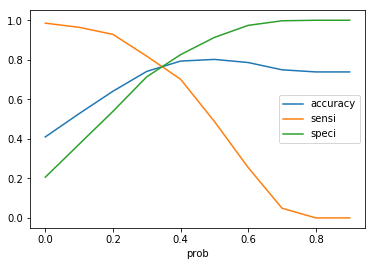

In [141]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [142]:
Y_train_pred_final['Final_Predicted'] = Y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.35 else 0)
Y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
879,0,0.345116,879,0,1,1,1,1,0,0,0,0,0,0,0
5790,0,0.325688,5790,0,1,1,1,1,0,0,0,0,0,0,0
6498,1,0.614704,6498,1,1,1,1,1,1,1,1,0,0,0,1
880,1,0.465858,880,0,1,1,1,1,1,0,0,0,0,0,1
2784,1,0.567556,2784,1,1,1,1,1,1,1,0,0,0,0,1


In [143]:
metrics.accuracy_score(Y_train_pred_final['Churn'], Y_train_pred_final['Final_Predicted'])

0.7681836651767574

In [144]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [145]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,MultipleLines_Yes
942,-0.347623,1,0,0,0,1,0,1,0,0,0,0,0
3730,0.999203,1,0,0,0,1,0,1,0,0,0,1,1
1761,1.040015,1,0,0,1,1,0,0,1,0,0,0,1
2283,-1.286319,1,0,0,0,0,1,1,0,0,0,0,0
1872,0.346196,0,0,0,1,0,0,0,1,0,0,0,0


In [146]:
X_test_sm = sm.add_constant(X_test)

In [147]:
Y_test_pred = logm4.predict(X_test_sm)

In [148]:
Y_test_pred.head()

942     0.440949
3730    0.339075
1761   -0.040902
2283    0.543455
1872    0.030357
dtype: float64

In [149]:
Y_test_pred_df = pd.DataFrame(Y_test_pred)
Y_test_pred_df.head()

,0
942,0.440949
3730,0.339075
1761,-0.040902
2283,0.543455
1872,0.030357


In [150]:
Y_test_df = pd.DataFrame(Y_test)

In [151]:
Y_test_df['CustID'] = Y_test_df.index

In [152]:
Y_test_df.head()

,Churn,CustID
942,0,942
3730,1,3730
1761,0,1761
2283,1,2283
1872,0,1872


In [153]:
Y_test_pred_df.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [154]:
Y_pred_final = pd.concat([Y_test_pred_df, Y_test_df], axis=1)
Y_pred_final.head()

,0,Churn,CustID
0,0.440949,0,942
1,0.339075,1,3730
2,-0.040902,0,1761
3,0.543455,1,2283
4,0.030357,0,1872


In [155]:
Y_pred_final = Y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [156]:
Y_pred_final.head()

,Churn_Prob,Churn,CustID
0,0.440949,0,942
1,0.339075,1,3730
2,-0.040902,0,1761
3,0.543455,1,2283
4,0.030357,0,1872


In [157]:
Y_pred_final['Final_Predicted'] = Y_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.42 else 0)
Y_pred_final.head()

,Churn_Prob,Churn,CustID,Final_Predicted
0,0.440949,0,942,1
1,0.339075,1,3730,0
2,-0.040902,0,1761,0
3,0.543455,1,2283,1
4,0.030357,0,1872,0


In [159]:
metrics.accuracy_score(Y_pred_final['Churn'], Y_pred_final['Final_Predicted'])

0.7781990521327015